In [112]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# Definisco la funzione per generare il fascio Gaussiano
def gaussian_beam(E0,w0,lambd,n,r,z):
    lambda_n = lambd/n 
    k = 2*np.pi/lambda_n
    zR = np.pi*w0**2/lambda_n
    #q0 = 1j*zR
    w = w0*(1+(z/zR)**2)**0.5
    R = z + zR**2/z
    phi = np.arctan(z/zR)
    gaussian = (w0/w)*np.exp(-1j*phi)*np.exp(-1j*k*r**2/(2*R))*np.exp(-r**2/w**2)*np.exp(1j*k*z)
    return zR, w, R, phi, gaussian


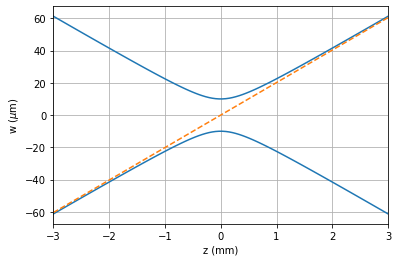

In [151]:
x = np.linspace(-30,30,100)
y = np.linspace(-30,30,100)
x, y = np.meshgrid(x, y)

r = np.sqrt(x**2 + y**2)
z = np.linspace(-3E3,3E3,100)


w0 = 10 # in micrometers
l = 0.633*1 # lunghezza d'onda laser a He-Ne in micrometri
[zR, w, R, phi, psi] = gaussian_beam(1,w0,l,1,0,z)
# scelto indice rifrazione n=1, mettp r = 0 per avere un vettore semplice in output

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(z/1E3,w,'C0')
ax.plot(z/1E3,-w,'C0')
ax.plot(z/1E3,w0*z/zR,'C1--')
plt.xlim([-max(z/1E3), max(z/1E3)])
plt.xlabel('z (mm)')
plt.ylabel('w ($\mu$m)')
plt.grid()

Text(0.5, 0, 'E/E0')

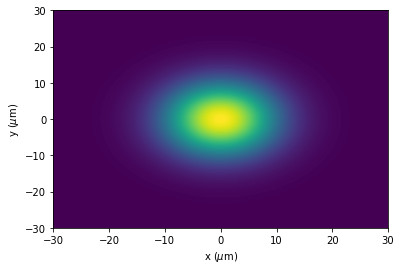

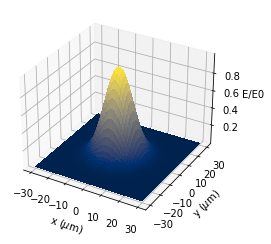

In [152]:
[zR, w, R, phi, psi] = gaussian_beam(1,w0,l,1,r,10) # indice rifrazione 1, a z = 10 um dal fuoco

fig, ax = plt.subplots()
ax.contourf(x,y,np.abs(psi), 200, cmap=cm.viridis)
plt.xlabel('x ($\mu$m)')
plt.ylabel('y ($\mu$m)')

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(x,y,np.abs(psi), cmap=cm.cividis, linewidth=0, antialiased=False)
plt.xlabel('x ($\mu$m)')
plt.ylabel('y ($\mu$m)')
ax.set_zlabel('E/E0')

Text(0.5, 0, 'E/E0')

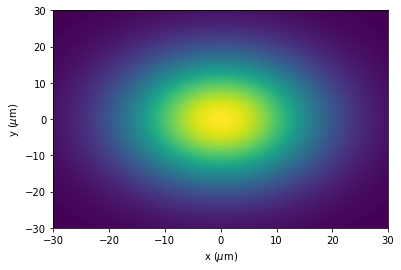

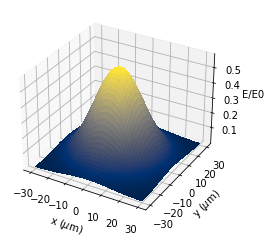

In [153]:
[zR, w, R, phi, psi] = gaussian_beam(1,w0,l,1,r,700) # indice rifrazione 1, a z = 700 um dal fuoco

fig, ax = plt.subplots()
ax.contourf(x,y,np.abs(psi), 200, cmap=cm.viridis)
plt.xlabel('x ($\mu$m)')
plt.ylabel('y ($\mu$m)')
#plt.grid()

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(x,y,np.abs(psi), cmap=cm.cividis, linewidth=0, antialiased=False)
plt.xlabel('x ($\mu$m)')
plt.ylabel('y ($\mu$m)')
ax.set_zlabel('E/E0')

Text(0, 0.5, 'r ($\\mu$m)')

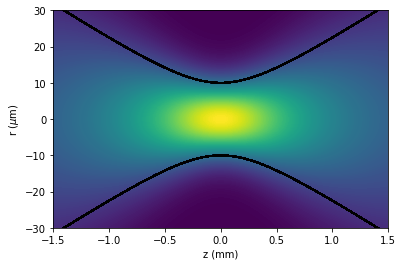

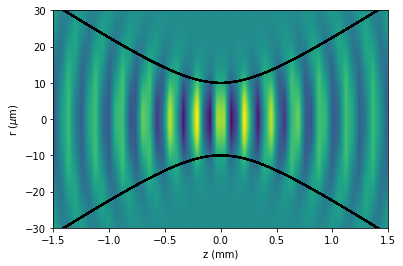

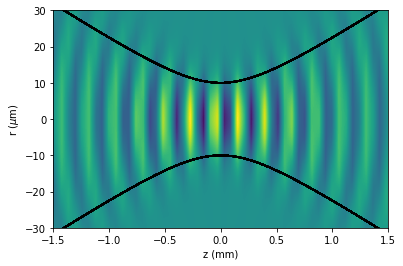

In [156]:
r = np.linspace(-30,30,100)
rr, zz = np.meshgrid(r, z)

[zR, w, R, phi, psi] = gaussian_beam(1,w0,l,1,rr,zz)

fig, ax = plt.subplots()
ax.contourf(zz/1E3,rr, np.abs(psi), 200, cmap=cm.viridis)
ax.plot(z/1E3,w,'k')
ax.plot(z/1E3,-w,'k')
plt.xlim([-1.5, 1.5])
plt.ylim([-30, 30])
plt.xlabel('z (mm)')
plt.ylabel('r ($\mu$m)')

fig, ax = plt.subplots()
ax.contourf(zz/1E3,rr, np.real(psi), 200, cmap=cm.viridis)
ax.plot(z/1E3,w,'k')
ax.plot(z/1E3,-w,'k')
plt.xlim([-1.5, 1.5])
plt.ylim([-30, 30])
plt.xlabel('z (mm)')
plt.ylabel('r ($\mu$m)')

fig, ax = plt.subplots()
ax.contourf(zz/1E3,rr, np.imag(psi), 200, cmap=cm.viridis)
ax.plot(z/1E3,w,'k')
ax.plot(z/1E3,-w,'k')
plt.xlim([-1.5, 1.5])
plt.ylim([-30, 30])
plt.xlabel('z (mm)')
plt.ylabel('r ($\mu$m)')
